In [69]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [85]:
import numpy as np
import pandas as pd
from pandas.plotting import table
import os
from scipy import stats

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func , inspect

In [87]:
from datetime import datetime
import datetime as dt
from dateutil.relativedelta import relativedelta

In [71]:
from flask import Flask, redirect, jsonify

# Reflect Tables into SQLAlchemy ORM

In [72]:
# create engine to hawaii.sqlite
db_path = os.path.join("C://Users//Angiescomputer//Desktop//AlchemyHW//hawaii.sqlite")
engine = create_engine(f"sqlite:///{db_path}")
# con = engine.connect()

In [88]:
inspector = inspect(engine)
inspector.get_table_names()


['Stations', 'measurement', 'station']

In [89]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [74]:
# View all of the classes that automap found
#save each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [75]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [76]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database.
last_measurement_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date = last_measurement_data_point [0]
latest_date = dt.datetime.strptime(latest_date, '%Y-%m-%d')
latest_date = latest_date.date()
date_year_ago = latest_date - relativedelta(years=1)

In [92]:
# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_year_ago).all()
#for record in data:
    #print(record)

In [93]:
# Save the query results as a Pandas DataFrame and set the index to the date column
climate_df = pd.DataFrame(last_year_data, columns = ['date', 'prcp'])
#drop nulls
climate_df = climate_df.dropna(how="any")
#set index
climate_df = climate_df.set_index("date")

In [94]:
# Sort the dataframe by date
climate_df = climate_df.sort_values(by=['date'])
climate_df.head(20000)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


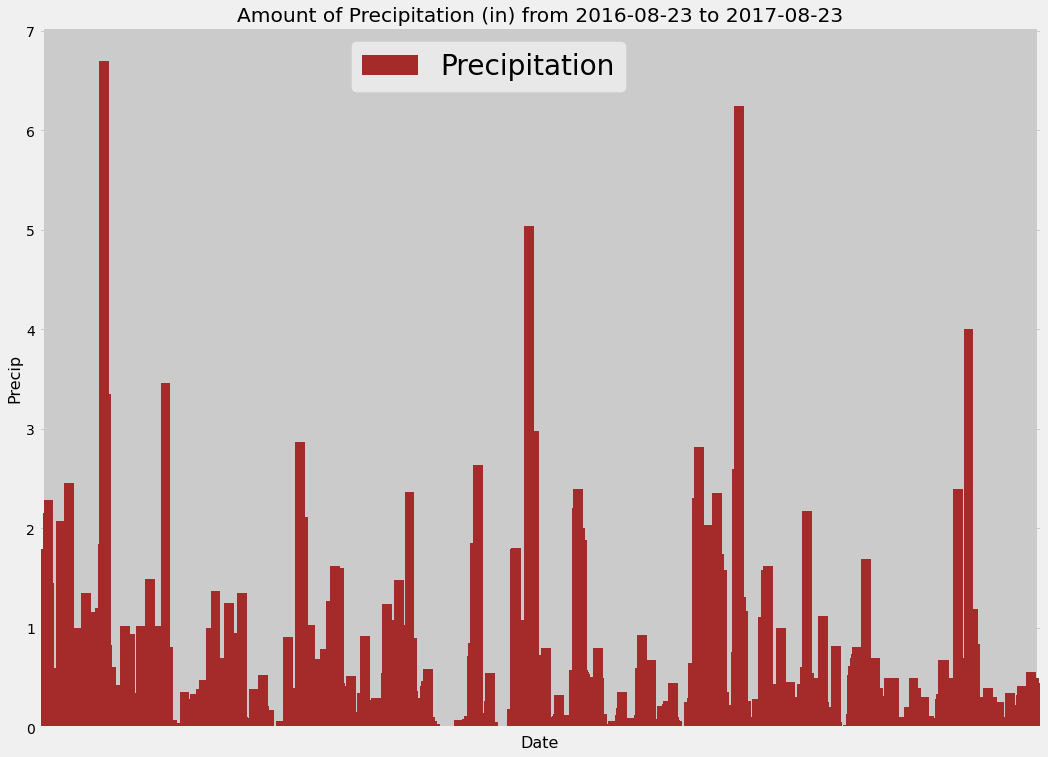

In [96]:
ax= climate_df.plot.bar(figsize=(16,12), width=20, color='brown')
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Precip", fontsize=16)
ax.set_xticklabels([])
ax.set_title(f"Amount of Precipitation (in) from {date_year_ago} to {latest_date}")
plt.legend(['Precipitation'], fontsize = 28)
ax.get_legend().set_bbox_to_anchor((0.6, 1))

plt.show()

In [100]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats = climate_df["prcp"].describe()
stats_df = pd.DataFrame(stats)
stats_df.rename(columns = {"prcp": "Precipitation"})

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [101]:
# Design a query to calculate the total number stations in the dataset
# Design a query to calculate the total number stations in the dataset
print(f"Number of stations available in this dataset.")
session.query(Station).group_by(Station.station).count()

Number of stations available in this dataset.


9

In [104]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
order_by(func.count(Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [106]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
print(f"The most active station is.")
most_active_station=session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).first()
most_active_station_id = most_active_station[0]
most_active_station_id


The most active station is.


'USC00519281'

In [108]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
print(f"The most active station ID with the lowest, highest, and avg temp recorded.")

most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == most_active_station_id).all()

for lowest_temp, highest_temp, avg_temp in most_active:
    print(f"The lowest temperature recorded at {most_active_station_id} was {lowest_temp}.")
    print(f"The highest temperature recorded at {most_active_station_id} was {highest_temp}.")
    print(f"The average temperature recorded at {most_active_station_id} was {avg_temp}.")
temperature_df = pd.DataFrame({
    "Lowest Temperature": lowest_temp,
    "Highest Temperature": highest_temp,
    "Average Temperature": avg_temp
}, index=[0])

temp_observation = session.query(Measurement.date).\
order_by(Measurement.date.desc()).\
filter(Measurement.station == most_active_station_id).first()

latest_date = temp_observation[0]
latest_date = dt.datetime.strptime(latest_date, '%Y-%m-%d')
latest_date = latest_date.date()
date_year_ago = latest_date - relativedelta(years=1)

last_year_data = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == most_active_station_id).\
filter(Measurement.date >= date_year_ago).all()

last_year_data_df = pd.DataFrame(last_year_data, columns=['date', 'tobs'])

last_year_data_df


The most active station ID with the lowest, highest, and avg temp recorded.
The lowest temperature recorded at USC00519281 was 54.0.
The highest temperature recorded at USC00519281 was 85.0.
The average temperature recorded at USC00519281 was 71.66378066378067.


,date,tobs
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0
...,...,...
352,2017-08-14,77.0
353,2017-08-15,77.0
354,2017-08-16,76.0
355,2017-08-17,76.0


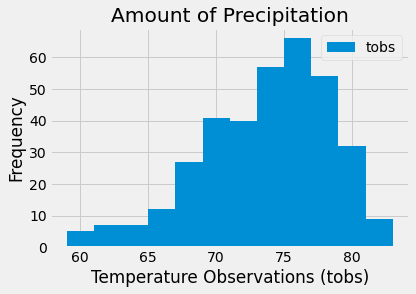

In [110]:
df = pd.DataFrame(last_year_data_df, columns=['tobs'])
df.plot.hist(bins=12)
plt.title(f"Amount of Precipitation")
plt.tight_layout()
plt.xlabel('Temperature Observations (tobs)')
plt.show()

# Close session

In [ ]:
# Close Session
session.close()